<a href="https://colab.research.google.com/github/sitiluthfiatinsolihah/BelajarCloneRespository/blob/main/No_2_UTS_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print ('Nama/NIM : Siti Luthfiatin Solihah (20210120015)')
print ('Jawaban UTS No.2 Machine Learning')

Nama/NIM : Siti Luthfiatin Solihah (20210120015)
Jawaban UTS No.2 Machine Learning


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler, MinMaxScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/dataset_uts-2021.csv', header=0)

In [ ]:
df = df[~df.duplicated()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No            9 non-null      int64  
 1   Name          9 non-null      object 
 2   Address       9 non-null      object 
 3   Mobile Phone  8 non-null      float64
 4   Project       7 non-null      object 
 5   Email         8 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 504.0+ bytes


In [ ]:
df.nunique()

No              9
Name            8
Address         8
Mobile Phone    7
Project         3
Email           7
dtype: int64

In [ ]:
df.describe()

,No,Mobile Phone
count,9.000000,8.000000e+00
mean,5.000000,4.971026e+08
std,2.738613,3.529227e+08
min,1.000000,0.000000e+00
25%,3.000000,1.253278e+08
50%,5.000000,6.791275e+08
75%,7.000000,7.895474e+08
max,9.000000,7.898212e+08


In [ ]:
df

,No,Name,Address,Mobile Phone,Project,Email
0,1,Princy Odom,Street 1 New Lane,789456120.0,Client,princy@text.com
1,2,Appy Alexa,Ac Street,568798821.0,Client,appy@text.com
2,3,Luna Knox,PO.BOX 12-Loren Park,NaN,NaN,luna@text.com
3,4,Clark Andrews,PO.BOX 156-Settle Road,123545342.0,Client,clark@text.com
4,5,Riley Drew,PO.BOX 16-Thames Street,789821211.0,intenal,riley@text.com
5,6,August Bork,PO.BOX 17-Thames Street,125921931.0,Internal,aug@text.com
6,7,Riley Drew,PO.BOX 16-Thames Street,789821211.0,Internal,riley@text.com
7,8,XYS,Street 12 New Way,0.0,NaN,NaN
8,9,Erica Flint,Street 7 New Lane Road,789456128.0,Internal,erica@text.com


In [ ]:
datasets_1 = np.genfromtxt('/content/drive/MyDrive/Machine Learning/dataset_uts-2021.csv', delimiter=',', dtype=str)

column_names = datasets_1[0]
data = datasets_1[1:]

df = pd.DataFrame(data, columns=column_names)


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
from numpy import unique
for i in range(df.shape[1]):
    if len(unique(df.iloc[:, i])) <= 1:
        print(i)
    else:
        print(i, len(unique(df.iloc[:, i])))

0 9
1 8
2 8
3 8
4 4
5 8


In [ ]:
print("Original Shape:", df.shape)

# 2a. Menghapus Baris Berulang (baris 5 dan 7)
df = df.drop_duplicates()

# 2b(1). mengganti missing values menjadi NaN
df.replace('', np.nan, inplace=True)

# 2b(2). menghapus NaN (missing values)
df = df.dropna()

print("Final Shape:", df.shape)

Original Shape: (9, 6)
Final Shape: (7, 6)


In [ ]:
#2c. Menghapus column yang tidak relevan (column pertama (0), No)
df.columns = df.columns.str.strip()
df.drop(['﻿No'], axis=1, errors='ignore', inplace=True)
np.random.seed(5)
data = df.to_numpy()
np.random.shuffle(data)
y = data[:, -1]
data = np.delete(data, [0], axis=1)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

categorical_features=[0,2,3]
categorical_names = {}
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data[:, feature])
    data[:, feature] = le.transform(data[:, feature])
    categorical_names[feature] = le.classes_


t = [('cat', OneHotEncoder(),[0,2,3]),('num',MinMaxScaler(),[1])]

transformer = ColumnTransformer(transformers=t)
le= LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_
data = data.astype(float)

data_1 = data[0:3000]
y_1 = y[0:3000]

In [ ]:
df

,Name,Address,Mobile Phone,Project,Email
0,Erica Flint,Street 7 New Lane Road,789456128,Internal,erica@text.com
1,Clark Andrews,PO.BOX 156-Settle Road,123545342,Client,clark@text.com
3,August Bork,PO.BOX 17-Thames Street,125921931,Internal,aug@text.com
4,Appy Alexa,Ac Street,568798821,Client,appy@text.com
5,Princy Odom,Street 1 New Lane,789456120,Client,princy@text.com
6,Riley Drew,PO.BOX 16-Thames Street,789821211,Internal,riley@text.com
8,Riley Drew,PO.BOX 16-Thames Street,789821211,intenal,riley@text.com


In [ ]:
df['Proyek'] = df['Proyek'].replace('intenal', 'Internal')
print(df)

            Nama                   Alamat Nomor Telepon    Proyek  \
0    Erica Flint   Street 7 New Lane Road     789456128  Internal   
1  Clark Andrews   PO.BOX 156-Settle Road     123545342    Client   
3    August Bork  PO.BOX 17-Thames Street     125921931  Internal   
4     Appy Alexa                Ac Street     568798821    Client   
5    Princy Odom        Street 1 New Lane     789456120    Client   
6     Riley Drew  PO.BOX 16-Thames Street     789821211  Internal   
8     Riley Drew  PO.BOX 16-Thames Street     789821211  Internal   

             Surel  
0   erica@text.com  
1   clark@text.com  
3     aug@text.com  
4    appy@text.com  
5  princy@text.com  
6   riley@text.com  
8   riley@text.com  


In [ ]:
!pip install googletrans==4.0.0-rc1

In [ ]:
from googletrans import Translator

def translate_column_names(df, target_language='id'):
    translator = Translator()
    translated_columns = [translator.translate(col, dest=target_language).text for col in df.columns]
    df.columns = translated_columns

translate_column_names(df, target_language='id')

In [ ]:
df

,Nama,Alamat,Telepon genggam,Proyek,Surel
0,Erica Flint,Street 7 New Lane Road,789456128,Internal,erica@text.com
1,Clark Andrews,PO.BOX 156-Settle Road,123545342,Client,clark@text.com
3,August Bork,PO.BOX 17-Thames Street,125921931,Internal,aug@text.com
4,Appy Alexa,Ac Street,568798821,Client,appy@text.com
5,Princy Odom,Street 1 New Lane,789456120,Client,princy@text.com
6,Riley Drew,PO.BOX 16-Thames Street,789821211,Internal,riley@text.com
8,Riley Drew,PO.BOX 16-Thames Street,789821211,intenal,riley@text.com


In [ ]:
df['Proyek'] = df['Proyek'].replace('internal','Internal')
print(df)

            Nama                   Alamat Nomor Telepon    Proyek  \
0    Erica Flint   Street 7 New Lane Road     789456128  Internal   
1  Clark Andrews   PO.BOX 156-Settle Road     123545342    Client   
3    August Bork  PO.BOX 17-Thames Street     125921931  Internal   
4     Appy Alexa                Ac Street     568798821    Client   
5    Princy Odom        Street 1 New Lane     789456120    Client   
6     Riley Drew  PO.BOX 16-Thames Street     789821211  Internal   
8     Riley Drew  PO.BOX 16-Thames Street     789821211   intenal   

             Surel  
0   erica@text.com  
1   clark@text.com  
3     aug@text.com  
4    appy@text.com  
5  princy@text.com  
6   riley@text.com  
8   riley@text.com  


In [ ]:
new_column_name = 'Nomor Telepon'
df.columns.values[2] = new_column_name
print(df)

            Nama                   Alamat Nomor Telepon    Proyek  \
0    Erica Flint   Street 7 New Lane Road     789456128  Internal   
1  Clark Andrews   PO.BOX 156-Settle Road     123545342    Client   
3    August Bork  PO.BOX 17-Thames Street     125921931  Internal   
4     Appy Alexa                Ac Street     568798821    Client   
5    Princy Odom        Street 1 New Lane     789456120    Client   
6     Riley Drew  PO.BOX 16-Thames Street     789821211  Internal   
8     Riley Drew  PO.BOX 16-Thames Street     789821211   intenal   

             Surel  
0   erica@text.com  
1   clark@text.com  
3     aug@text.com  
4    appy@text.com  
5  princy@text.com  
6   riley@text.com  
8   riley@text.com  


In [ ]:
df.columns = df.columns.str.strip()
df['Nomor Telepon']

0    789456128
1    123545342
3    125921931
4    568798821
5    789456120
6    789821211
8    789821211
Name: Nomor Telepon, dtype: object

In [ ]:
df.drop_duplicates(inplace=True)
print(df)

            Nama                   Alamat Nomor Telepon    Proyek  \
0    Erica Flint   Street 7 New Lane Road     789456128  Internal   
1  Clark Andrews   PO.BOX 156-Settle Road     123545342    Client   
3    August Bork  PO.BOX 17-Thames Street     125921931  Internal   
4     Appy Alexa                Ac Street     568798821    Client   
5    Princy Odom        Street 1 New Lane     789456120    Client   
6     Riley Drew  PO.BOX 16-Thames Street     789821211  Internal   
8     Riley Drew  PO.BOX 16-Thames Street     789821211   intenal   

             Surel  
0   erica@text.com  
1   clark@text.com  
3     aug@text.com  
4    appy@text.com  
5  princy@text.com  
6   riley@text.com  
8   riley@text.com  


In [ ]:
df.to_csv('/content/drive/MyDrive/Machine Learning/dataset_uts-2021.csv', index=False)
print("Processed dataset saved successfully.")

Processed dataset saved successfully.


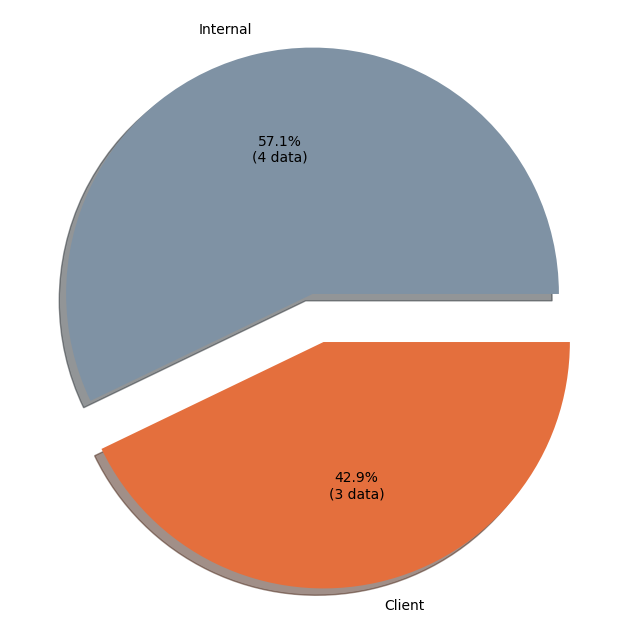

In [ ]:
colors = ['#7f92a4', '#e46f3d']
value_counts = df['Proyek'].value_counts()
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(value_counts, labels=value_counts.index, autopct=lambda p: '{:.1f}%\n({:d} data)'.format(p, int(p / 100 * sum(value_counts))), explode=[0.1, 0.1], shadow=True, colors=colors)
plt.show()

In [ ]:
df

,Nama,Alamat,Nomor Telepon,Proyek,Surel
0,Erica Flint,Street 7 New Lane Road,789456128,Internal,erica@text.com
1,Clark Andrews,PO.BOX 156-Settle Road,123545342,Client,clark@text.com
3,August Bork,PO.BOX 17-Thames Street,125921931,Internal,aug@text.com
4,Appy Alexa,Ac Street,568798821,Client,appy@text.com
5,Princy Odom,Street 1 New Lane,789456120,Client,princy@text.com
6,Riley Drew,PO.BOX 16-Thames Street,789821211,Internal,riley@text.com
8,Riley Drew,PO.BOX 16-Thames Street,789821211,Internal,riley@text.com


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 8
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nama           7 non-null      object
 1   Alamat         7 non-null      object
 2   Nomor Telepon  7 non-null      object
 3   Proyek         7 non-null      object
 4   Surel          7 non-null      object
dtypes: object(5)
memory usage: 336.0+ bytes
